<a href="https://colab.research.google.com/github/hamzaabialal/data/blob/main/Crop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
area_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/area_data.csv")
export_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/export.csv")
import_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/import.csv")
prices_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/prices.csv")
production_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/production_data.csv")
yield_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/yield_data.csv")


In [ ]:
print("Area Data:", area_data.shape)
print("Export Data:", export_data.shape)
print("Import Data:", import_data.shape)
print("Prices Data:", prices_data.shape)
print("Production Data:", production_data.shape)
print("Yield Data:", yield_data.shape)

Area Data: (2353, 7)
Export Data: (31, 9)
Import Data: (31, 9)
Prices Data: (2966, 5)
Production Data: (2358, 7)
Yield Data: (2357, 7)


In [ ]:
area_data.head()

,YEAR,Punjab,Sindh,Khyber Pakhtoonkhaw,Balochistan,PAKISTAN,crop
0,1947-48,6.0,0.0,0.0,0.0,6.0,linseed
1,1948-49,6.0,0.0,0.0,0.0,6.0,linseed
2,1949-50,6.0,0.0,0.0,0.0,6.0,linseed
3,1950-51,8.0,0.0,0.0,0.0,8.0,linseed
4,1951-52,8.0,0.0,0.0,0.0,8.0,linseed


In [ ]:
export_data.head()

,Sr.No,Commodity,Qty,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Wheat,Qty,1189.604,689.487,48.083,-,-,-
1,2,Rice All,Qty,4096.446,4104.983,4166.130,3691.437,4975.926,3717.559
2,3,Rice Basmati,Qty,520.759,668.763,890.207,629.069,758.219,595.120
3,4,Rice Others,Qty,3585.251,3436.220,3275.923,3062.368,4217.707,3122.439
4,5,Sugar,Qty,1469.802,691.994,181.447,-,-,215.751


In [ ]:
import_data.head()

,Sr.No,Commodity,Qty,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Wheat,Qty,-,-.1,-.2,3612.638,2206.880,2729.238
1,2,Sugar,Qty,8.794,7.563,7.473,281.329,312.393,6.205
2,3,Raw Cotton,Qty,610.149,414.659,536.231,857.373,776.394,683.911
3,4,Pulses,Qty,723.843,976.669,1211.383,1266.313,897.352,1344.412
4,5,Soyabean Oil,Qty,156.718,150.912,84.317,116.637,143.530,227.385


In [ ]:
production_data.head()

,YEAR,Punjab,Sindh,Khyber Pakhtoonkhaw,Balochistan,PAKISTAN,crop
0,1957-58,79.0,5.0,4.0,0.0,88.0,citrus
1,1958-59,89.0,4.0,13.0,0.0,106.0,citrus
2,1959-60,286.0,5.0,7.0,0.0,298.0,citrus
3,1960-61,301.0,3.0,4.0,0.0,308.0,citrus
4,1961-62,340.0,6.0,13.0,0.0,359.0,citrus


In [ ]:
prices_data.head()

,Crop,Min,Max,FQP,city
0,Apple Kala Kullu (Pahari),28100,32000,30050,TTSingh
1,Apricot White,26200,27000,26600,TTSingh
2,Banana(DOZEN),112,125,119,TTSingh
3,Grapes Sundekhani,39500,45000,42250,TTSingh
4,Guava,10500,12000,11250,TTSingh


In [ ]:
yield_data.head()

,YEAR,Punjab,Sindh,Khyber Pakhtoonkhaw,Balochistan,PAKISTAN,crop
0,1947-48,9.38,8.4,5.36,9.15,8.73,rice
1,1948-49,10.6,7.9,7.4,8.6,8.90,rice
2,1949-50,9.92,7.77,7.24,8.2,8.59,rice
3,1950-51,8.8,9.09,5.92,8.4,8.89,rice
4,1951-52,9.35,7.71,7.24,7.04,8.23,rice


# **Model Training on Area Data Set**

In [ ]:
y_area_data = area_data["crop"]
y_area_data = area_data["crop"]

# Step 2: Convert the 'crop' column to category
y_area_data = y_area_data.astype('category')
y_area_data.head()

,crop
0,linseed
1,linseed
2,linseed
3,linseed
4,linseed


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming area_data is already loaded
# Step 1: Set the target variable
y_area_data = area_data["crop"].astype('category')

# Step 2: Convert the 'crop' column to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_area_data)

# Step 3: Prepare the feature DataFrame by dropping the 'crop' column
x_area_data = area_data.drop("crop", axis=1)

# Step 4: Convert relevant columns in x_area_data to category
x_area_data["YEAR"] = x_area_data['YEAR'].astype('category')
x_area_data["Punjab"] = x_area_data['Punjab'].astype('category')
x_area_data["Sindh"] = x_area_data['Sindh'].astype('category')

# Step 5: Drop rows with null values in x_area_data
x_area_data = x_area_data.dropna(subset=["YEAR", "Punjab", "Sindh", "Khyber Pakhtoonkhaw", "Balochistan", "PAKISTAN"])

# Step 6: Align the encoded target with x_area_data
y_encoded = y_encoded[x_area_data.index]

# Step 7: Verify that y_encoded has no NaN values
print("NaN values in y_encoded:", pd.isna(y_encoded).sum())

# Step 8: Split the data into training and testing sets
# Check the shapes

x_area_data= area_data.drop("crop", axis=1)

x_area_data["YEAR"] = x_area_data['YEAR'].astype('category')
x_area_data["Punjab"] = x_area_data['Punjab'].astype('category')
x_area_data["Sindh"] = x_area_data['Sindh'].astype('category')
x_area_data.isnull().sum()
x_area_data = x_area_data.dropna(subset=["YEAR", "Punjab", "Sindh", "Khyber Pakhtoonkhaw", "Balochistan", "PAKISTAN"])
x_area_data.isnull().sum()
print("Null Values",y_area_data.isnull().sum())
print("Null Values",x_area_data.isnull().sum())
print(x_area_data.dtypes)
print(y_encoded)




NaN values in y_encoded: 0
Null Values 0
Null Values YEAR                   0
Punjab                 0
Sindh                  0
Khyber Pakhtoonkhaw    0
Balochistan            0
PAKISTAN               0
dtype: int64
YEAR                   category
Punjab                 category
Sindh                  category
Khyber Pakhtoonkhaw     float64
Balochistan             float64
PAKISTAN                float64
dtype: object
[16 16 16 ... 19 19 19]


In [ ]:
from sklearn.model_selection import train_test_split
y_area_data = y_area_data.reset_index(drop=True)
x_area_data = x_area_data.reset_index(drop=True)
x_area_data["YEAR"] = x_area_data['YEAR'].astype('category')
x_area_data["Punjab"] = x_area_data['Punjab'].astype('category')
x_area_data["Sindh"] = x_area_data['Sindh'].astype('category')
x_train, x_test, y_train, y_test = train_test_split(x_area_data,y_encoded, test_size=0.2, random_state=100)
print(x_train.dtypes)
print(x_test.dtypes)


YEAR                   category
Punjab                 category
Sindh                  category
Khyber Pakhtoonkhaw     float64
Balochistan             float64
PAKISTAN                float64
dtype: object
YEAR                   category
Punjab                 category
Sindh                  category
Khyber Pakhtoonkhaw     float64
Balochistan             float64
PAKISTAN                float64
dtype: object


In [ ]:
print(x_train.dtypes)


YEAR                   category
Punjab                 category
Sindh                  category
Khyber Pakhtoonkhaw     float64
Balochistan             float64
PAKISTAN                float64
dtype: object


In [ ]:
print(x_area_data)


         YEAR Punjab Sindh  Khyber Pakhtoonkhaw  Balochistan  PAKISTAN
0     1947-48    6.0   0.0                 0.00         0.00      6.00
1     1948-49    6.0   0.0                 0.00         0.00      6.00
2     1949-50    6.0   0.0                 0.00         0.00      6.00
3     1950-51    8.0   0.0                 0.00         0.00      8.00
4     1951-52    8.0   0.0                 0.00         0.00      8.00
...       ...    ...   ...                  ...          ...       ...
2343  2017-18  27.43  0.49                 1.98         7.91     37.81
2344  2018-19  24.68  0.49                 2.22         7.91     35.31
2345  2019-20  23.05  0.25                 2.22         7.91     33.43
2346  2020-21  11.67  0.06                 2.38        13.15     27.26
2347  2021-22    4.2  0.07                 2.26        13.32     19.86

[2348 rows x 6 columns]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming area_data is already loaded
# Step 1: Set the target variable and encode it
y_area_data = area_data["crop"].astype('category')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_area_data)

# Step 2: Prepare the feature DataFrame
x_area_data = area_data.drop("crop", axis=1)

# Convert categorical columns to category type
x_area_data["YEAR"] = x_area_data['YEAR'].astype('category')
x_area_data["Punjab"] = x_area_data['Punjab'].astype('category')
x_area_data["Sindh"] = x_area_data['Sindh'].astype('category')

# Step 3: Drop rows with null values in x_area_data
x_area_data = x_area_data.dropna(subset=["YEAR", "Punjab", "Sindh", "Khyber Pakhtoonkhaw", "Balochistan", "PAKISTAN"])

# Step 4: Align the encoded target with x_area_data
y_encoded = y_encoded[x_area_data.index]

# Step 5: One-Hot Encoding for categorical features
x_area_data = pd.get_dummies(x_area_data, drop_first=True)

# Step 6: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_area_data, y_encoded, test_size=0.2, random_state=100)

# Step 7: Initialize and fit the Linear Regression model
clf = RandomForestClassifier(random_state=100)
clf.fit(x_train, y_train)

# Check the shapes
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(1878, 2690) (470, 2690) (1878,) (470,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=100)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

In [ ]:
y_lr_area_data_train_pred = clf.predict(x_train)
y_lr_area_data_test_pred = clf.predict(x_test)
y_lr_area_data_train_pred


array([18, 20,  6, ..., 33,  2,  8])

In [ ]:
y_lr_area_data_test_pred

array([29,  2,  1, 25, 21, 15, 23, 22,  7, 11, 10,  6, 15, 19, 19, 20,  4,
        0, 23, 30, 28, 17,  4, 16,  4, 16, 21, 28, 28,  3, 19, 26, 14, 23,
       22, 12, 15, 11, 16,  6, 31,  6, 10, 23, 27, 30, 14,  6, 18, 14, 12,
       17, 15,  6, 31, 33, 23, 19, 17, 21,  4, 27,  4, 13, 11, 12, 18, 28,
       26, 12, 28, 27, 22, 27, 23,  1, 26, 28, 13,  1, 28, 29,  6, 28, 31,
       33, 21,  0, 15, 30,  3,  9, 26, 32, 23, 17, 31, 32, 20, 17, 14, 32,
        5, 23, 31, 32, 16,  7, 14, 21,  0,  7, 12,  6,  0, 31,  2, 14, 18,
       29,  4, 13, 15, 33, 22, 15, 26,  0, 24, 13, 30, 21,  0, 20, 31, 29,
       14,  9, 16, 24, 22, 19, 17, 12,  4, 18,  6,  2, 16,  5, 33,  0,  6,
       20, 22, 15,  8,  0,  1, 21,  7, 12, 29, 16,  9,  6,  6,  7, 15, 14,
        8, 23,  2,  0, 13, 30, 26,  8,  3,  3, 18, 29, 17, 26, 33,  7,  9,
        6, 31, 31, 18, 13, 19, 21,  2, 19, 20, 26,  9,  4,  4, 32, 33,  2,
       21,  6, 29, 21,  8, 17, 26, 31, 14,  4,  2, 31, 12, 25, 11,  9,  6,
        6, 21, 10,  8, 13

In [ ]:
y_encoded

array([16, 16, 16, ..., 19, 19, 19])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_lr_area_data_train_pred)
rf_test_mse = mean_squared_error(y_test, y_lr_area_data_test_pred)
rf_train_r2 = r2_score(y_train, y_lr_area_data_train_pred)
rf_test_r2 = r2_score(y_test, y_lr_area_data_test_pred)
print("Random Forest Regression Train MSE:", rf_train_mse)
print("Random Forest Regression Test MSE:", rf_test_mse)

Random Forest Regression Train MSE: 0.0
Random Forest Regression Test MSE: 29.642553191489363


In [ ]:
lr_results  =  pd.DataFrame(["Random Forest Regressor", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Regressor,0.0,1.0,29.642553,0.675425


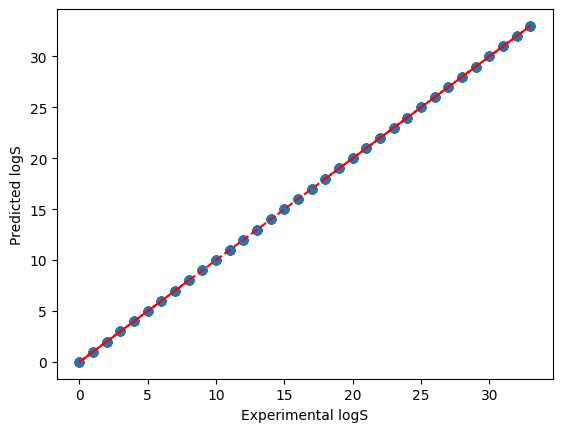

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_train, y_lr_area_data_train_pred, 1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),"r--")
plt.scatter(y_train, y_lr_area_data_train_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

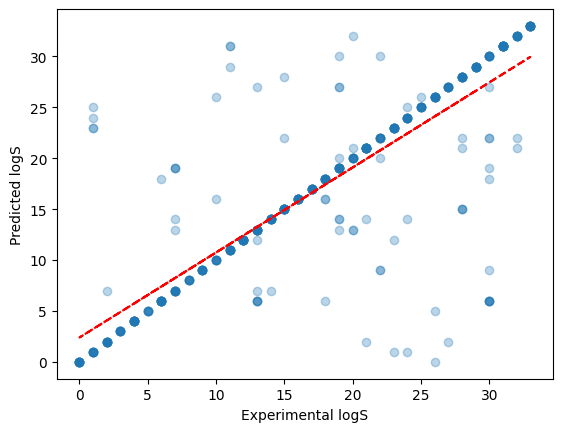

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_test, y_lr_area_data_test_pred, 1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.scatter(y_test, y_lr_area_data_test_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

In [ ]:
import joblib
joblib.dump(clf, 'area_data_model.pkl')

['area_data_model.pkl']

# **Training Model On Export Data Set**

In [ ]:
export_data.head()

,Sr.No,Commodity,Qty,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Wheat,Qty,1189.604,689.487,48.083,-,-,-
1,2,Rice All,Qty,4096.446,4104.983,4166.130,3691.437,4975.926,3717.559
2,3,Rice Basmati,Qty,520.759,668.763,890.207,629.069,758.219,595.120
3,4,Rice Others,Qty,3585.251,3436.220,3275.923,3062.368,4217.707,3122.439
4,5,Sugar,Qty,1469.802,691.994,181.447,-,-,215.751


In [ ]:
export_data['2022-23'] = export_data['2022-23'].replace('-', '0').astype(float)
export_data['2021-22'] = export_data['2021-22'].replace('-', '0').astype(float)
export_data['2020-21'] = export_data['2020-21'].replace('-', '0').astype(float)
export_data['2019-20'] = export_data['2019-20'].replace('-', '0').astype(float)
export_data['2018-19'] = export_data['2018-19'].replace('-', '0').astype(float)
export_data['2017-18'] = export_data['2017-18'].replace('-', '0').astype(float)

export_data['Qty'] = export_data['2022-23'].fillna(0)
y_export_data = export_data["Qty"]

x_export_data = export_data.drop("Qty", axis=1)

import numpy as np

y_export_data = np.log1p(y_export_data)  # Log transformation


# **Data Processing**



In [ ]:
y_export_data

,Qty
0,0.000000
1,8.221092
2,6.390442
3,8.046690
4,5.378749
5,2.536471
6,6.445439
7,7.198750
8,5.167474
9,4.587912


In [ ]:
x_export_data["Commodity"] = x_export_data['Commodity'].astype('category')

x_export_data


,Sr.No,Commodity,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Wheat,1189.604,689.487,48.083,0.000,0.000,0.000
1,2,Rice All,4096.446,4104.983,4166.130,3691.437,4975.926,3717.559
2,3,Rice Basmati,520.759,668.763,890.207,629.069,758.219,595.120
3,4,Rice Others,3585.251,3436.220,3275.923,3062.368,4217.707,3122.439
4,5,Sugar,1469.802,691.994,181.447,0.000,0.000,215.751
5,6,Raw Cotton,35.347,12.665,12.776,0.594,2.752,11.635
6,7,Fruits All,710.221,768.208,807.313,982.269,622.086,628.823
7,8,Vegetables All,875.269,1029.735,836.330,950.724,939.714,1336.757
8,9,"Oil Seeds, Nuts & Kernals",29.634,51.088,21.574,86.970,144.120,174.471
9,10,Sesamum (SESAME) Seeds,24.363,49.414,19.571,79.464,138.295,97.289


In [ ]:
x_export_data = pd.get_dummies(x_export_data, columns=['Commodity'], drop_first=True)
x_export_data

,Sr.No,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,Commodity_Apricot Fresh,Commodity_Bananas,Commodity_Carrot & Turnip,...,Commodity_Rice All,Commodity_Rice Basmati,Commodity_Rice Others,Commodity_Sesamum (SESAME) Seeds,Commodity_Sugar,Commodity_Tomato,Commodity_Turmeric,Commodity_Vegetables All,Commodity_Water Melon,Commodity_Wheat
0,1,1189.604,689.487,48.083,0.000,0.000,0.000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,4096.446,4104.983,4166.130,3691.437,4975.926,3717.559,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,520.759,668.763,890.207,629.069,758.219,595.120,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,4,3585.251,3436.220,3275.923,3062.368,4217.707,3122.439,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5,1469.802,691.994,181.447,0.000,0.000,215.751,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,6,35.347,12.665,12.776,0.594,2.752,11.635,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,710.221,768.208,807.313,982.269,622.086,628.823,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,8,875.269,1029.735,836.330,950.724,939.714,1336.757,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,9,29.634,51.088,21.574,86.970,144.120,174.471,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,24.363,49.414,19.571,79.464,138.295,97.289,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_export_data,y_export_data, test_size=0.2, random_state=100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24, 37), (7, 37), (24,), (7,))

In [ ]:
print(y_export_data.describe())
print(y_export_data.value_counts())

count    31.000000
mean      3.265785
std       2.684957
min       0.000000
25%       0.455308
50%       3.247074
75%       5.198129
max       8.221092
Name: Qty, dtype: float64
Qty
0.000000    3
0.019803    2
8.221092    1
2.619219    1
0.422650    1
1.415610    1
4.365758    1
2.498399    1
4.803316    1
3.491434    1
4.681131    1
5.228785    1
0.487966    1
0.279146    1
1.417308    1
3.957990    1
3.247074    1
6.967679    1
1.116125    1
4.587912    1
5.167474    1
7.198750    1
6.445439    1
2.536471    1
5.378749    1
8.046690    1
6.390442    1
0.227136    1
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, n_estimators=50)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50)

In [ ]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Random Forest Regression Train MSE:", train_mse)
print("Random Forest Regression Test MSE:", test_mse)
print("Random Forest Regression Train R²:", train_r2)
print("Random Forest Regression Test R²:", test_r2)

Random Forest Regression Train MSE: 0.07609811591012407
Random Forest Regression Test MSE: 0.12068406942463446
Random Forest Regression Train R²: 0.9885160201741556
Random Forest Regression Test R²: 0.9847923949285627


In [ ]:
rf_results  =  pd.DataFrame(["Random Forest Classifier", train_mse, train_r2, test_mse, test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Classifier,0.076098,0.988516,0.120684,0.984792


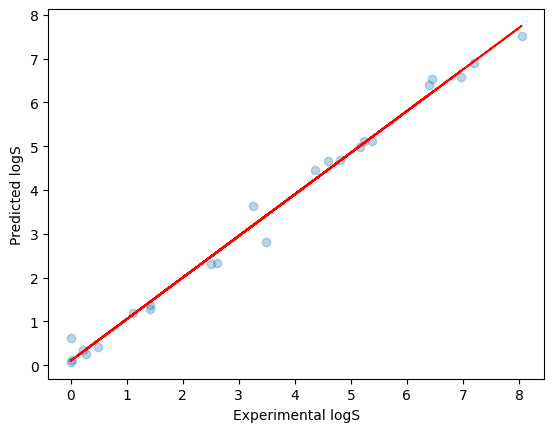

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_train, y_train_pred, 1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),"r--")
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

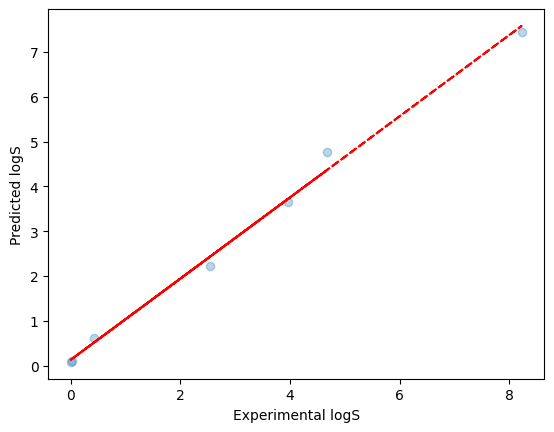

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_test, y_test_pred, 1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Use cross-validation to evaluate the model
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

# Convert MSE scores to positive values
mse_scores = -mse_scores

print("Cross-Validated MSE Scores:", mse_scores)
print("Average Training MSE:", mse_scores.mean())
print("Cross-Validated R² Scores:", r2_scores)
print("Average Training R²:", r2_scores.mean())


Cross-Validated MSE Scores: [0. 0. 0. 0. 0.]
Average Training MSE: 0.0
Cross-Validated R² Scores: [1. 1. 1. 1. 1.]
Average Training R²: 1.0


# **Model Training on Import Data**

In [ ]:
import_data.head()

,Sr.No,Commodity,Qty,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Wheat,<NA>,<NA>,-.1,-.2,3612.638,2206.880,2729.238
1,2,Sugar,<NA>,8.794,7.563,7.473,281.329,312.393,6.205
2,3,Raw Cotton,<NA>,610.149,414.659,536.231,857.373,776.394,683.911
3,4,Pulses,<NA>,723.843,976.669,1211.383,1266.313,897.352,1344.412
4,5,Soyabean Oil,<NA>,156.718,150.912,84.317,116.637,143.530,227.385


In [ ]:
import_data = import_data.fillna(0)

In [ ]:
import_data['2022-23'] = import_data['2022-23'].replace('-', '0').astype(float)
import_data['2021-22'] = import_data['2021-22'].replace('-', '0').astype(float)
import_data['2020-21'] = import_data['2020-21'].replace('-', '0').astype(float)
import_data['2019-20'] = import_data['2019-20'].replace('-', '0').astype(float)
import_data['2018-19'] = import_data['2018-19'].replace('-', '0').astype(float)
import_data['2017-18'] = import_data['2017-18'].replace('-', '0').astype(float)

import_data['Qty'] = import_data['2022-23'].fillna(0)
y_import_data = import_data["Qty"]

x_import_data = import_data.drop("Qty", axis=1)

import numpy as np

y_import_data = np.log1p(y_import_data)  # Log transformation


In [ ]:
print("X Types", x_import_data.dtypes)
print("Y Types", y_import_data.dtypes)

X Types Sr.No          int64
Commodity     object
2017-18      float64
2018-19      float64
2019-20      float64
2020-21      float64
2021-22      float64
2022-23      float64
dtype: object
Y Types float64


In [ ]:
X.shape

(31, 6)

In [ ]:
y_import_data = y_import_data.astype('category')
y_import_data.dtypes

CategoricalDtype(categories=['Qty'], ordered=False, categories_dtype=object)

In [ ]:
x_import_data=pd.get_dummies(x_import_data, columns=['Commodity'], drop_first=True)

x_import_data.head()

,Sr.No,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,Commodity_Apricot Fresh,Commodity_Banana,Commodity_Carrot & Turnip,...,Commodity_Potato,Commodity_Pulses,Commodity_Raw Cotton,Commodity_Red Chilli,Commodity_Soyabean Oil,Commodity_Sugar,Commodity_Tomato,Commodity_Turmeric,Commodity_Water Melon,Commodity_Wheat
0,1,0.000,-0.100,-0.200,3612.638,2206.880,2729.238,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,8.794,7.563,7.473,281.329,312.393,6.205,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,3,610.149,414.659,536.231,857.373,776.394,683.911,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4,723.843,976.669,1211.383,1266.313,897.352,1344.412,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,5,156.718,150.912,84.317,116.637,143.530,227.385,False,False,False,...,False,False,False,False,True,False,False,False,False,False


,0
Commodity_Apricot Fresh,0
Commodity_Banana,0
Commodity_Carrot & Turnip,0
Commodity_Dates Dried,0
Commodity_Dates Fresh,0
...,...
2022-23_625.059,0
2022-23_63.855,0
2022-23_683.911,0
2022-23_70.437,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_import_data,y_import_data, test_size=0.2, random_state=100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24, 37), (7, 37), (24,), (7,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=5, random_state=50)

# Fit the model
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=50)

In [ ]:
rf_import_pred = regressor.predict(x_train)
rf_import_test_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R² for training and testing data
rf_train_mse = mean_squared_error(y_train, rf_import_pred)
rf_train_r2 = r2_score(y_train, rf_import_pred)
rf_test_mse = mean_squared_error(y_test, rf_import_test_pred)
rf_test_r2 = r2_score(y_test, rf_import_test_pred)

# Create a DataFrame to store the results
rf_results = pd.DataFrame({
    "Method": ["Random Forest Regressor"],
    "Training MSE": [rf_train_mse],
    "Training R²": [rf_train_r2],
    "Test MSE": [rf_test_mse],
    "Test R²": [rf_test_r2]
})

# Print the results
print(rf_results)

# Print individual metrics
print("Random Forest Regression Train MSE:", rf_train_mse)
print("Random Forest Regression Test MSE:", rf_test_mse)
print("Random Forest Regression Train R²:", rf_train_r2)
print("Random Forest Regression Test R²:", rf_test_r2)

                    Method  Training MSE  Training R²  Test MSE   Test R²
0  Random Forest Regressor      0.115095     0.979151  0.288334  0.961128
Random Forest Regression Train MSE: 0.11509546083082346
Random Forest Regression Test MSE: 0.288333930950071
Random Forest Regression Train R²: 0.9791509642659233
Random Forest Regression Test R²: 0.9611280737734316


In [ ]:
rf_results  =  pd.DataFrame(["Random Forest Classifier", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Classifier,0.115095,0.979151,0.288334,0.961128


Cross-validated MSE: -0.0


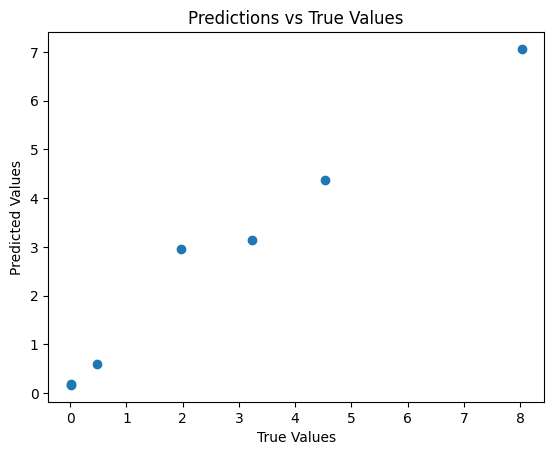

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

plt.scatter(y_test, rf_import_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs True Values')
plt.show()



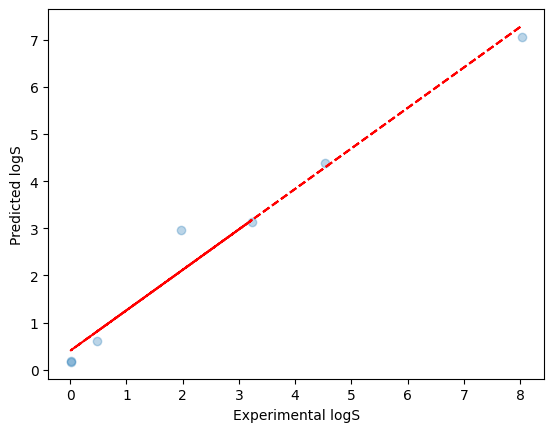

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_test, rf_import_test_pred, 1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.scatter(y_test, rf_import_test_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

# **Price Data Set Model Training**

In [2]:
prices_data

,Crop,Min,Max,FQP,city
0,Apple Kala Kullu (Pahari),28100,32000,30050,TTSingh
1,Apricot White,26200,27000,26600,TTSingh
2,Banana(DOZEN),112,125,119,TTSingh
3,Grapes Sundekhani,39500,45000,42250,TTSingh
4,Guava,10500,12000,11250,TTSingh
...,...,...,...,...,...
2961,Potato Fresh,7150,8000,7575,Sambrial
2962,Spinach,7000,8000,7500,Sambrial
2963,Tomato,8500,10200,9350,Sambrial
2964,Turnip,14000,16000,15000,Sambrial


In [17]:
y_price_data = prices_data["FQP"]
x_price_data = prices_data.drop("FQP", axis=1)
x_price_data.isnull().sum()

,0
Crop,0
Min,0
Max,0
city,0


In [18]:
import pandas as pd
print(x_price_data.columns)

# Assuming x_price_data is your DataFrame
x_price_data = pd.get_dummies(x_price_data, columns=['Crop', 'city'], drop_first=True)
x_price_data.dtypes

Index(['Crop', 'Min', 'Max', 'city'], dtype='object')


,0
Min,int64
Max,int64
Crop_Apple Kala Kullu (Madani),bool
Crop_Apple Kala Kullu (Pahari),bool
Crop_Apricot White,bool
...,...
city_Tandlianwala,bool
city_Taunsasharif,bool
city_Vehari,bool
city_Wazirabad,bool


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_price_data,y_price_data, test_size=0.2, random_state=100)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=5, random_state=50)

# Fit the model
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=50)

In [26]:
lr_price_pred = regressor.predict(x_train)
lr_price_test_pred = regressor.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R² for training and testing data
lr_train_mse = mean_squared_error(y_train, lr_price_pred)
lr_train_r2 = r2_score(y_train, lr_price_pred)
lr_test_mse = mean_squared_error(y_test, lr_price_test_pred)
lr_test_r2 = r2_score(y_test, lr_price_test_pred)
print("Train MSE", lr_train_mse)
print("Train R2", lr_train_r2)
print("Test MSE", lr_test_mse)
print("Test R2", lr_test_r2)

Train MSE 178286.22322641185
Train R2 0.9990391754353308
Test MSE 189158.91377815284
Test R2 0.999007770596577


Cross-validated MSE: 494455.29059854464


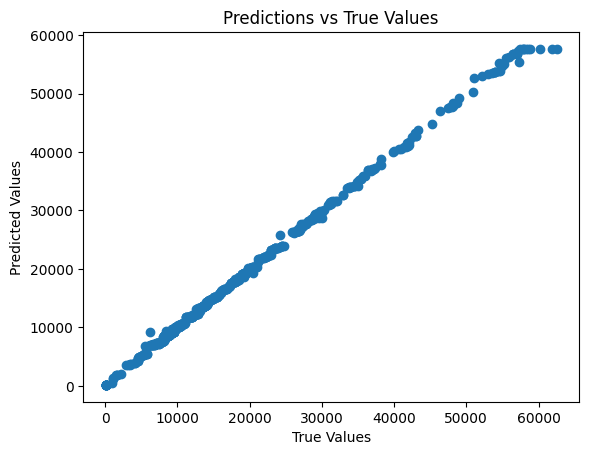

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, x_price_data, y_price_data, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

plt.scatter(y_test, lr_price_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs True Values')
plt.show()



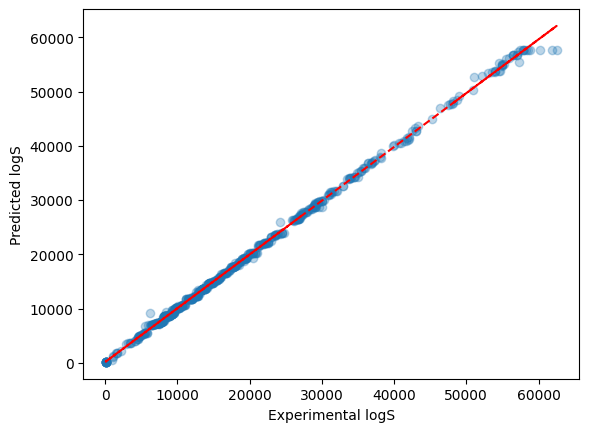

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_test, lr_price_test_pred, 1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.scatter(y_test, lr_price_test_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()